## **Author** - **Tejaswini** **Vadlamudi** 

**DataScience & BusinessAnalytics Intern - The Spark Foundation** #**GRIPJUNE21**

**Prediction using Supervised ML Task1**

**Predict the percentage of an student based on the no. of study hours.**


In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'


In [3]:
#Importing Data into DataFrame and checking first 5 values
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Checking Datatypes
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
#Checking For missing Data
missing_data=data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Hours
False    25
Name: Hours, dtype: int64

Scores
False    25
Name: Scores, dtype: int64



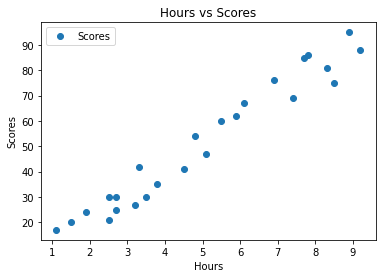

In [6]:
#Checking Relationship between Hours and scores by plotting a scatterplot
data.plot(x='Hours',y='Scores',style= 'o')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [8]:
#Preparing Data
x = data.iloc[:,:-1].values #Hours
y = data.iloc[:, 1].values #Scores

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

**Training Algorithm**

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Successfully Trained")

Successfully Trained


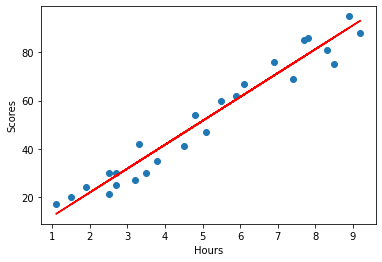

In [11]:
#Plotting graph for regression line
line = lr.coef_*x +lr.intercept_
plt.scatter (x,y)
plt.plot(x,line,color='Red')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

**Predictions**

In [12]:
Y_predictions=lr.predict(x_test)

In [13]:
print(x_test,Y_predictions)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]] [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [14]:
#Checking Our own Prediction by some hours value
hrs=float(input("Enter No of hours: "))
scores_prediction=lr.predict([[hrs]])
print(f"Predicted score for {hrs} hours study per day is {scores_prediction[0]}")

Enter No of hours: 9.25
Predicted score for 9.25 hours study per day is 93.69173248737539


**Model Evalution**

In [15]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': Y_predictions})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


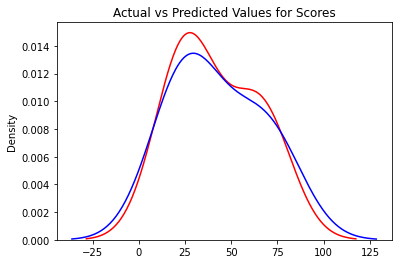

In [16]:

#Visualizing Actual vs predicted values in graph
import seaborn as sns
%matplotlib inline
ax1 = sns.distplot(y_test, hist=False, color="red", label="Actual Value")
sns.distplot(Y_predictions, hist=False, color="blue", label="Predicted Values" , ax=ax1)
plt.title('Actual vs Predicted Values for Scores')
plt.show()

In [17]:
#Mean Absolute error
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, Y_predictions))

Mean Absolute Error: 4.183859899002982


**What will be predicted score if a student studies for 9.25 hrs/ day?**

In [18]:
print(f"Predicted score for {hrs} hours study per day is {scores_prediction[0]}")

Predicted score for 9.25 hours study per day is 93.69173248737539


**Thank You**